In [1]:
from sage.plot.plot3d.shapes import *
from sage.plot.plot3d.shapes2 import Line

In [8]:
def palette(col, n):
    if col == 'red':
        return (1 - n/8,0.2 + n/10,0)
    elif col == 'blue':
        return (0,0.5 + n/10,1 - n/8)

Faces =  Sphere(.1, color='red',opacity = 1)
Faces += Sphere(.1, color='blue', opacity = 1).translate(0,.01,0)
    

Face_1 = polygon3d([[1,2,1], [-1,2,1],[-1,.5,1],[1,.5,1]], alpha = 0.9, color='lightgray')
Face_2 = Face_1.translate((0,-2.5,0))
Face_3 = polygon3d([[-.5,.5,1], [-1,.5,1],[-1,-.5,1],[-.5,-.5,1]], alpha = 0.9, color='lightgray')
Face_4 = Face_3.translate((1.5,0,0))
Face_5 = polygon3d([[1,2,1], [1,-2,1],[1,-2,-1],[1,2,-1]], alpha = 0.9, color='lightgray')

Faces += Face_1 + Face_2 + Face_3 + Face_4
Faces += (Face_1 + Face_2 + Face_3 + Face_4).translate((0,0,-2))
Faces += Face_5 + Face_5.translate((-2,0,0))


OuterEdges = Sphere(1, opacity=0)


for i in range(4):
    OuterEdges += LineSegment([1,2,1], [-1,2,1], 4, color=palette('blue',i)).rotate((0,1,0),i * math.pi/2)
    OuterEdges += LineSegment([1,-2,1], [-1,-2,1], 4, color=palette('red',i)).rotate((0,1,0),i * math.pi/2)

    
InnerEdges = OuterEdges.rotate((1,0,0),math.pi/2).scale(0.5,0.5,0.5)

Quotient = Faces + InnerEdges + OuterEdges
Quotient.plot()

Graphics3d Object

In [3]:
nested = [Quotient]

for i in range(10):
    nested += [nested[-1].scale(0.5,0.5,0.5).rotate((1,0,0),math.pi/2)]

sum(nested).plot()

Graphics3d Object

In [4]:
import flatsurf
from flatsurf import *

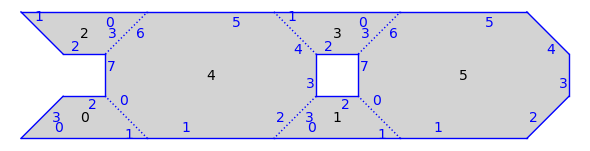

In [5]:
s = Surface_list(QQ)

P1 = flatsurf.polygons(vertices = [(0,0),(3,0),(2,1),(1,1)])
P2 = flatsurf.polygons(vertices = [(0,1),(1,0),(4,0),(5,1),(5,2),(4,3),(1,3),(0,2)])


s.add_polygon(P1)
s.add_polygon(P1)
s.add_polygon(P1)
s.add_polygon(P1)
s.add_polygon(P2)
s.add_polygon(P2)


S = SimilaritySurface(s)


s.set_edge_pairing(0,2,3,0)
s.set_edge_pairing(0,1,4,0)
s.set_edge_pairing(0,3,5,2)
s.set_edge_pairing(1,0,1,2)
s.set_edge_pairing(1,1,5,0)
s.set_edge_pairing(1,3,4,2)
s.set_edge_pairing(2,0,2,2)
s.set_edge_pairing(2,1,5,4)
s.set_edge_pairing(2,3,4,6)
s.set_edge_pairing(3,1,4,4)
s.set_edge_pairing(3,3,5,6)
s.set_edge_pairing(4,1,4,3)
s.set_edge_pairing(4,4,3,1)
s.set_edge_pairing(4,5,4,7)
s.set_edge_pairing(5,1,5,7)
s.set_edge_pairing(5,3,5,5)
s.set_edge_pairing(0,0,3,2)

    
S.plot(edge_labels='number')


gs = S.graphical_surface()


gs.make_adjacent(4,4)
gs.make_adjacent(3,3)


gs.plot()

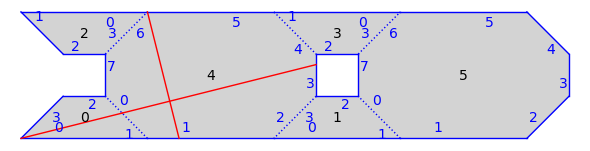

In [6]:
# Here's a trajectory:

v = S.tangent_vector(0, (0,0), (4,1))
traj1 = v.straight_line_trajectory()
traj1.flow(2)
S.plot() + traj1.plot(color='red')

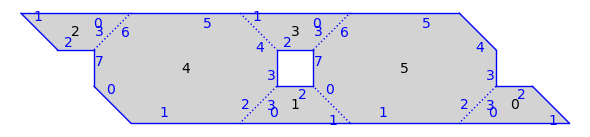

In [7]:
# A base like this has rotational symmetry:

gs.make_adjacent(5,2)
gs.plot()